<a href="https://colab.research.google.com/github/blue-within-blue-ice/machineLearning/blob/main/BT_8_PCA_i_inne_metody_redukcji_wymiaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

**Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.**

Jest to możliwe jeśli pozostałe dane byłyby liniowymi transformacjami tych dwóch komponentów.

**Zadanie2: Rozważ dane . Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.**

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
iris_dt = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [13]:
X, y = iris_dt.iloc[:, 1:].values, iris_dt.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

In [14]:
pca.components_[:3]

array([[ 0.36199536, -0.6635849 , -0.65468653],
       [-0.93122679, -0.22567675, -0.28615847],
       [ 0.04214291,  0.71324967, -0.69964197]])

In [17]:
pca.score(X_train_pca)

-9.894383454054958

In [18]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names) #jakie osoby tam są?
print()
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


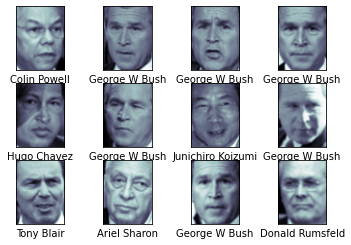

In [19]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])

In [25]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)

In [26]:
pca.components_[:3]

array([[-0.00543475, -0.00567504, -0.00652177, ..., -0.0117233 ,
        -0.01101585, -0.01028406],
       [ 0.01620826,  0.01504931,  0.01447542, ..., -0.03488227,
        -0.03502887, -0.03495963],
       [-0.01382979, -0.01208312, -0.01047852, ..., -0.03335575,
        -0.03003956, -0.02917316]], dtype=float32)

In [35]:
pca.components_[0].reshape(62, 47)

array([[-0.00543475, -0.00567504, -0.00652177, ..., -0.0085527 ,
        -0.00791628, -0.00808533],
       [-0.00560654, -0.00610134, -0.00717789, ..., -0.00896831,
        -0.00835499, -0.00854391],
       [-0.00641866, -0.00716168, -0.00799368, ..., -0.00950469,
        -0.00854169, -0.00900673],
       ...,
       [-0.0005414 , -0.00017214, -0.00075779, ..., -0.0119526 ,
        -0.01078851, -0.01041468],
       [-0.00115036, -0.00110535, -0.00139056, ..., -0.01189051,
        -0.01080665, -0.01031595],
       [-0.00178917, -0.00193776, -0.00260154, ..., -0.0117233 ,
        -0.01101585, -0.01028406]], dtype=float32)

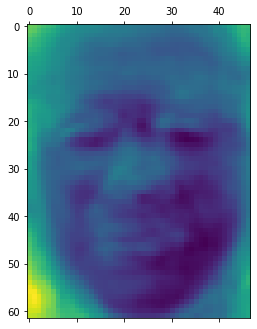

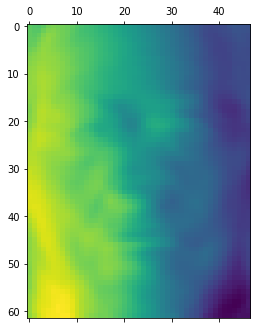

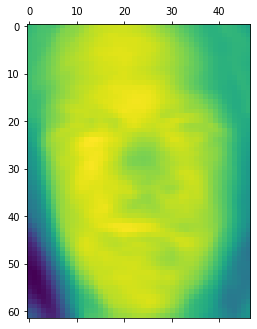

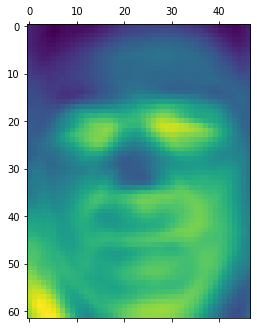

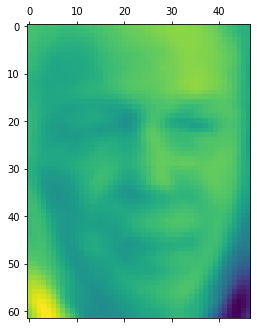

In [37]:
for i in range(5):
  plt.matshow(pca.components_[i].reshape(62, 47))
  plt.show()

**Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?**

Tak, różne aplitudy pozwalają rozróżnić niezależne wartości.